In [ ]:
import tensorflow as tf
tf.keras.utils.get_file('cats_and_dogs_filtered.zip',"https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip")


68606236/68606236 [==============================] - 1s 0us/step


'/root/.keras/datasets/cats_and_dogs_filtered.zip'

In [ ]:
import os
import zipfile #to handle zip file

local_zip = '/root/.keras/datasets/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models


In [ ]:
std_normalize = transforms.Normalize(mean=[0, 0, 0],std=[1, 1, 1])


In [ ]:
trans_train = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomRotation(5),
    transforms.RandomHorizontalFlip(),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    std_normalize
])
trans_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    std_normalize
])

In [ ]:
train_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/train',transform=trans_train)


In [ ]:
test_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/validation',transform=trans_test)


In [ ]:
batch_size = 20


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)


In [ ]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)


In [ ]:
examples = iter(train_loader)
samples ,labels = next(examples)
print(samples.shape)
labels

torch.Size([20, 3, 224, 224])


tensor([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
def imshow(img,title):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(25,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()


In [ ]:
sample_plot = samples[0:16]
label_plot = labels[0:16]


In [ ]:
out = torchvision.utils.make_grid(sample_plot)


In [ ]:
class_name = train_dataset.classes


In [ ]:
class_name


['cats', 'dogs']

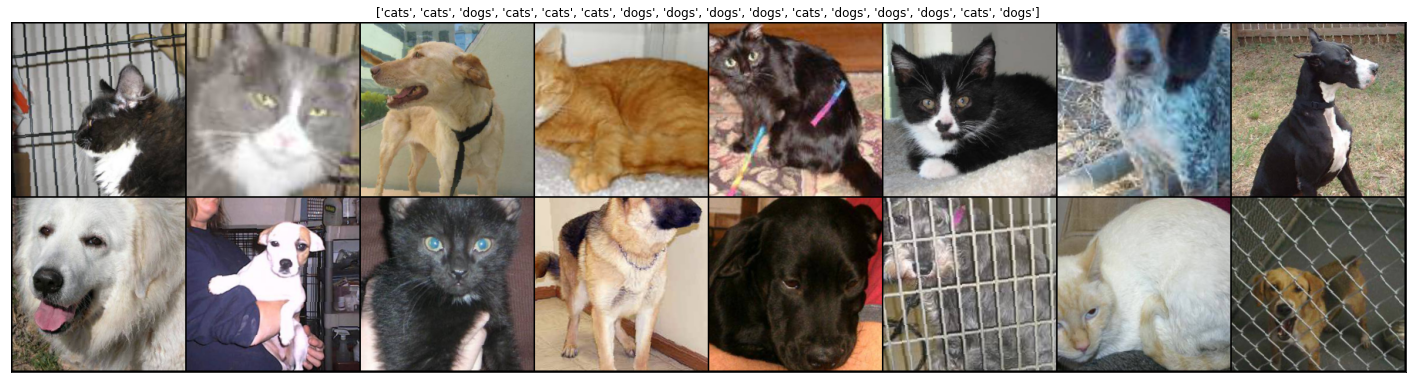

In [ ]:
imshow(out,title=[class_name[x] for x in label_plot])


In [ ]:
model = models.resnet50(pretrained=True)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
#freeze all params
for params in model.parameters():
  params.requires_grad_ = False


In [ ]:
#add a new final layer
nr_filters = model.fc.in_features  #number of input features of last layer
model.fc = nn.Sequential(nn.Linear(nr_filters,512),
                        nn.ReLU(),
                        nn.Dropout(0.2),
                        nn.Linear(512,2))


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.01)
model = model.to(device)


In [ ]:
#Train the network
num_epochs = 2
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        #labels = labels.unsqueeze(1).float()
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #if (epoch+1) % 1 == 0:    # 
        #    print(f'epoch:{epoch+1},loss={running_loss}')
        #    running_loss = 0.0
        if not i % 8:
            print (f'Epoch: {epoch+1:03d}/{num_epochs:03d} | '
                   f'Batch {i:03d}/{len(train_loader):03d} |' 
                   f' Cost: {running_loss:.2f}')
            running_loss = 0.0

print('Finished Training')

Epoch: 001/002 | Batch 000/100 | Cost: 0.69
Epoch: 001/002 | Batch 008/100 | Cost: 85.53
Epoch: 001/002 | Batch 016/100 | Cost: 7.09
Epoch: 001/002 | Batch 024/100 | Cost: 0.75
Epoch: 001/002 | Batch 032/100 | Cost: 0.75
Epoch: 001/002 | Batch 040/100 | Cost: 0.56
Epoch: 001/002 | Batch 048/100 | Cost: 0.75
Epoch: 001/002 | Batch 056/100 | Cost: 1.84
Epoch: 001/002 | Batch 064/100 | Cost: 0.69
Epoch: 001/002 | Batch 072/100 | Cost: 1.23
Epoch: 001/002 | Batch 080/100 | Cost: 0.88
Epoch: 001/002 | Batch 088/100 | Cost: 0.68
Epoch: 001/002 | Batch 096/100 | Cost: 1.07
Epoch: 002/002 | Batch 000/100 | Cost: 0.08
Epoch: 002/002 | Batch 008/100 | Cost: 1.04
Epoch: 002/002 | Batch 016/100 | Cost: 0.58
Epoch: 002/002 | Batch 024/100 | Cost: 0.49
Epoch: 002/002 | Batch 032/100 | Cost: 0.94
Epoch: 002/002 | Batch 040/100 | Cost: 1.25
Epoch: 002/002 | Batch 048/100 | Cost: 1.32
Epoch: 002/002 | Batch 056/100 | Cost: 0.82
Epoch: 002/002 | Batch 064/100 | Cost: 1.82
Epoch: 002/002 | Batch 072/100 

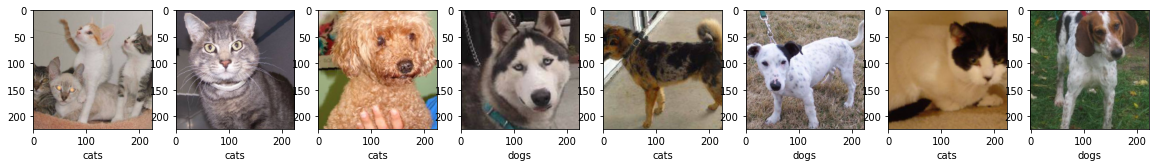

In [25]:
import numpy as np
test_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                         batch_size=batch_size, 
                         shuffle=True)

for features, targets in test_loader:
    break
    

predictions = model(features[:8].to(device))
#print(predictions)
#predictions = int(predictions)
d = test_dataset.classes
#print(d)
#print(predictions)
predictions = torch.max(predictions,dim=1)[1]
predictions = predictions.cpu()
predictions = predictions.numpy()
fig, ax = plt.subplots(1, 8, figsize=(20, 10))
for i in range(8):
    img = features[i]
    ax[i].imshow(np.transpose(img, (1, 2, 0)))
    ax[i].set_xlabel(d[int(np.array(predictions[i].item()).round())])
    #print(int(np.array(predictions[i].item()).round()))

plt.show()
